In [4]:
%pip install curl_cffi

     ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
      --------------------------------------- 0.0/2.3 MB 1.4 MB/s eta 0:00:02
     - -------------------------------------- 0.1/2.3 MB 1.2 MB/s eta 0:00:02
     -- ------------------------------------- 0.1/2.3 MB 901.1 kB/s eta 0:00:03
     --- ------------------------------------ 0.2/2.3 MB 1.1 MB/s eta 0:00:03
     ---- ----------------------------------- 0.2/2.3 MB 1.1 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/2.3 MB 1.1 MB/s eta 0:00:02
     ----- ---------------------------------- 0.3/2.3 MB 1.1 MB/s eta 0:00:02
     ------- -------------------------------- 0.4/2.3 MB 1.2 MB/s eta 0:00:02
     ------- -------------------------------- 0.4/2.3 MB 1.1 MB/s eta 0:00:02
     -------- ------------------------------- 0.5/2.3 MB 1.1 MB/s eta 0:00:02
     --------- ------------------------------ 0.5/2.3 MB 1.1 MB/s eta 0:00:02
     ---------- ----------------------------- 0.6/2.3 MB 1.1 MB/s eta


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import GetOldTweets3 as got
import requests
import pytrends
from pytrends.request import TrendReq
from ta import add_all_ta_features
import praw
import pandas as pd
import os
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime
import keras
from io import StringIO
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
import numpy as np
import plotly.express as px

In [4]:
from pytrends import dailydata
res = dailydata.get_daily_data("AMZN", start_year=2024, start_mon=2, stop_year=2024, stop_mon=3, geo = '')
display(res)


AMZN:2024-02-01 2024-02-29
AMZN:2024-03-01 2024-03-31


,AMZN_unscaled,AMZN_monthly,isPartial,scale,AMZN
date,,,,,
2024-02-01,84,84,False,0.84,70.56
2024-02-02,100,100,False,1.00,100.00
2024-02-03,20,20,False,0.20,4.00
2024-02-04,10,10,False,0.10,1.00
2024-02-05,39,39,False,0.39,15.21
2024-02-06,33,33,False,0.33,10.89
2024-02-07,32,32,False,0.32,10.24
2024-02-08,33,33,False,0.33,10.89
2024-02-09,34,34,False,0.34,11.56


In [5]:
amzn_daily = res
fig = px.line(amzn_daily, y=['AMZN_unscaled'], title='Keyword Web Search Interest Over Time')
fig.show()

In [8]:
pytrend = TrendReq()

#provide your search terms
kw_list=['AMZN']

#search interest per region
#run model for keywords (can also be competitors)
pytrend.build_payload(kw_list, cat=0, timeframe='today 5-y') 

data = pytrend.interest_over_time() 
data = data.drop(columns=['isPartial'])
data = data.reset_index() 

fig = px.line(data, x="date", y=['AMZN'], title='Keyword Web Search Interest Over Time')
fig.show()

In [24]:
display(data)
amzn_weekly = data

,date,AMZN
0,2019-03-31,70
1,2019-04-07,65
2,2019-04-14,64
3,2019-04-21,100
4,2019-04-28,82
...,...,...
257,2024-03-03,30
258,2024-03-10,27
259,2024-03-17,30
260,2024-03-24,26


In [21]:
import json
import urllib.parse
from datetime import datetime, timedelta
from curl_cffi import requests
import time

def build_payload(keywords, timeframe='now 7-d', geo='US'):
    token_payload = {
        'hl': 'en-US',
        'tz': '0',
        'req': {
            'comparisonItem': [{'keyword': keyword, 'time': timeframe, 'geo': geo} for keyword in keywords],
            'category': 0,
            'property': ''
        }
    }
    token_payload['req'] = json.dumps(token_payload['req'])
    return token_payload

def convert_to_desired_format(raw_data):
    trend_data = {}
    for entry in raw_data['default']['timelineData']:
        timestamp = int(entry['time'])
        date_time_str = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
        value = entry['value'][0]
        trend_data[date_time_str] = value
    return trend_data

# Cookies
def get_google_cookies(impersonate_version='chrome110'):
    with requests.Session() as session:
        session.get("https://www.google.com", impersonate=impersonate_version)
        return session.cookies

def fetch_trends_data(keywords, days_ago=7, geo='US', hl='en-US', max_retries=5, browser_version='chrome110', browser_switch_retries=2):
    browser_versions = ['chrome110', 'edge101', 'chrome107', 'chrome104', 'chrome100', 'chrome101', 'chrome99']
    current_browser_version_index = browser_versions.index(browser_version)
    cookies = get_google_cookies(impersonate_version=browser_versions[current_browser_version_index])

    for browser_retry in range(browser_switch_retries + 1):
        data_fetched = False  # Reset data_fetched to False at the beginning of each browser_retry
        with requests.Session() as s:
            # phase 1: token
            for retry in range(max_retries):
                time.sleep(2)
                token_payload = build_payload(keywords)
                url = 'https://trends.google.com/trends/api/explore'
                params = urllib.parse.urlencode(token_payload)
                full_url = f"{url}?{params}"
                response = s.get(full_url, impersonate=browser_versions[current_browser_version_index], cookies=cookies)
                if response.status_code == 200:
                    content = response.text[4:]
                    try:
                        data = json.loads(content)
                        widgets = data['widgets']
                        tokens = {}
                        request = {}
                        for widget in widgets:
                            if widget['id'] == 'TIMESERIES':
                                tokens['timeseries'] = widget['token']
                                request['timeseries'] = widget['request']
                        break  # Break out of the retry loop as we got the token
                    except json.JSONDecodeError:
                        print(f"Failed to decode JSON while fetching token, retrying {retry + 1}/{max_retries}")
                else:
                    print(f"Error {response.status_code} while fetching token, retrying {retry + 1}/{max_retries}")
            else:
                print(f"Exceeded maximum retry attempts ({max_retries}) while fetching token. Exiting...")
                return None

            # phase 2: trends data
            for retry in range(max_retries):
                time.sleep(5)
                req_string = json.dumps(request['timeseries'], separators=(',', ':'))
                encoded_req = urllib.parse.quote(req_string, safe=':,+')
                url = f"https://trends.google.com/trends/api/widgetdata/multiline?hl={hl}&tz=0&req={encoded_req}&token={tokens['timeseries']}&tz=0"
                response = s.get(url, impersonate=browser_versions[current_browser_version_index], cookies=cookies)
                if response.status_code == 200:
                    content = response.text[5:]
                    try:
                        raw_data = json.loads(content)
                        # Convert raw data
                        trend_data = convert_to_desired_format(raw_data)
                        data_fetched = True  # Set data_fetched to True as we have successfully fetched the trend data
                        return trend_data
                    except json.JSONDecodeError:
                        print(f"Failed to decode JSON while fetching trends data, retrying {retry + 1}/{max_retries}")
                else:
                    print(f"Error {response.status_code} while fetching trends data, retrying {retry + 1}/{max_retries}")
            else:
                print(f"Exceeded maximum retry attempts ({max_retries}) while fetching trends data.")

        # change browser
        if not data_fetched and browser_retry < browser_switch_retries:
            time.sleep(5)
            current_browser_version_index = (current_browser_version_index + 1) % len(browser_versions)
            print(f"Switching browser version to {browser_versions[current_browser_version_index]} and retrying...")

    print(f"Exceeded maximum browser switch attempts ({browser_switch_retries}). Exiting...")
    return None

# Example
keywords = ["AMZN"]
trends_data = fetch_trends_data(keywords)
print(trends_data)

Error 400 while fetching token, retrying 1/5
Error 400 while fetching token, retrying 2/5
Error 400 while fetching token, retrying 3/5


KeyboardInterrupt: 

In [6]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'GOOG', 'NVDA']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):
   
        title = row.a.text
        date_data = re.split(r'\s+', row.td.text.strip())
 
        if len(date_data) == 1:
            time = date_data[0]
        else:
            if date_data[0] == 'Today':
                date = datetime.now().strftime('%b-%d-%y')
            else:
                date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

In [7]:
vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)

df['date'] = pd.to_datetime(df.date).dt.date

C:\Users\razva\AppData\Local\Temp\ipykernel_6444\3340248726.py:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



<Figure size 1000x800 with 0 Axes>

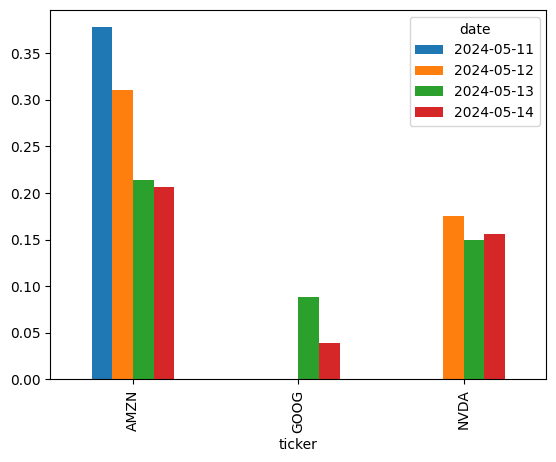

In [8]:
plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean(numeric_only=True).unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()

In [9]:
AMZN = yf.Ticker("AMZN")
AMZN = AMZN.history(start='2020-01-01',end='2024-04-03')
amzn = AMZN[['Close', 'Volume']]
amzn.index = amzn.index.tz_localize(None)
sentiment_transposed = mean_df.T
sentiment_transposed.index = pd.to_datetime(sentiment_transposed.index)

# Merge DataFrames
merged_df = pd.merge(amzn, sentiment_transposed[['AMZN']], left_index=True, right_index=True, how='left')
merged_df = pd.merge(merged_df, amzn_daily[['AMZN_unscaled']], left_index=True, right_index=True, how='left')
merged_df = merged_df.rename(columns={'AMZN': 'Sentiment'})
merged_df = merged_df.rename(columns={'AMZN_unscaled': 'Trend'})
merged_df['Sentiment'] = merged_df['Sentiment'].fillna(0)
merged_df['Trend'] = merged_df['Trend'].fillna(0)
merged_df=merged_df[['Close','Sentiment','Trend']]
display(merged_df)

,Close,Sentiment,Trend
Date,,,
2020-01-02,94.900497,0.0,0.0
2020-01-03,93.748497,0.0,0.0
2020-01-06,95.143997,0.0,0.0
2020-01-07,95.343002,0.0,0.0
2020-01-08,94.598503,0.0,0.0
...,...,...,...
2024-03-26,178.300003,0.0,77.0
2024-03-27,179.830002,0.0,76.0
2024-03-28,180.380005,0.0,90.0


In [10]:
sc = MinMaxScaler(feature_range=(0,3))
split_idx = int(len(merged_df) * 0.8)

train_df = merged_df.iloc[:split_idx]
test_df = merged_df.iloc[split_idx:]

training_set_scaled = sc.fit_transform(train_df)

X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=10,batch_size=32)

C:\Users\razva\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 479ms/step - loss: 1.6305
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 484ms/step - loss: 0.1500
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 454ms/step - loss: 0.1073
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 478ms/step - loss: 0.0979
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 477ms/step - loss: 0.0921
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 473ms/step - loss: 0.1007
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 493ms/step - loss: 0.1003
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 483ms/step - loss: 0.0827
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 488ms/step - loss: 0.0715
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 542ms/step - loss: 0.0776


In [12]:
dataset_total = merged_df
inputs = dataset_total[len(dataset_total) - len(test_df) - 60:].values
#inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
#predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# # Create a temporary array with the correct shape expected by the scaler
# temp_array = np.zeros((predicted_stock_price.shape[0], 2))  # Shape (16, 2) to match the scaler

# # Place the predicted stock prices into the first column of the temporary array
# temp_array[:, 0] = predicted_stock_price.ravel()  # Assuming predictions correspond to the 'Close' prices

# # Perform the inverse transformation on the adjusted array
# inverse_transformed_array = sc.inverse_transform(temp_array)

# # Extract the inverse transformed 'Close' prices, now correctly scaled
# corrected_predicted_stock_price = inverse_transformed_array[:, 0]

# # corrected_predicted_stock_price now contains the 'Close' prices after inverse transformation
# predicted_stock_price = corrected_predicted_stock_price


C:\Users\razva\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [22]:
display(test_df)

,Close,Sentiment,Trend
Date,,,
2023-05-25,115.000000,0.0,0.0
2023-05-26,120.110001,0.0,0.0
2023-05-30,121.660004,0.0,0.0
2023-05-31,120.580002,0.0,0.0
2023-06-01,122.769997,0.0,0.0
...,...,...,...
2024-03-26,178.300003,0.0,77.0
2024-03-27,179.830002,0.0,76.0
2024-03-28,180.380005,0.0,90.0


In [13]:
real_stock_price = sc.transform(test_df)

In [ ]:
real_stock_price = np.delete(real_stock_price, 1, 1)

In [28]:
display(real_stock_price)

array([[0.95025804],
       [1.09660581],
       [1.1409971 ],
       [1.1100664 ],
       [1.17278672],
       [1.21517325],
       [1.2452448 ],
       [1.28276245],
       [1.12868211],
       [1.21517325],
       [1.19168889],
       [1.28161684],
       [1.28419451],
       [1.27732088],
       [1.29708219],
       [1.25068615],
       [1.25899163],
       [1.23178421],
       [1.38414603],
       [1.36066188],
       [1.30338291],
       [1.35636569],
       [1.35235618],
       [1.31970741],
       [1.39016051],
       [1.386151  ],
       [1.39073342],
       [1.33288154],
       [1.37354956],
       [1.29765488],
       [1.34491007],
       [1.40276195],
       [1.50300014],
       [1.51388285],
       [1.48180677],
       [1.46090007],
       [1.53335792],
       [1.37870489],
       [1.37985028],
       [1.34548299],
       [1.35493407],
       [1.32686706],
       [1.32973118],
       [1.44314373],
       [1.48524336],
       [1.42825107],
       [1.3285858 ],
       [1.348

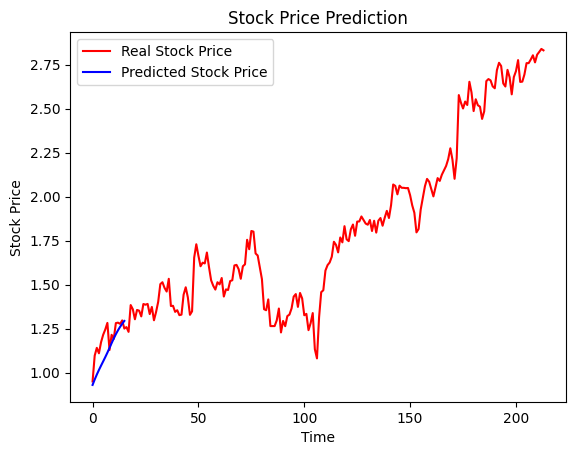

In [29]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()